In [1]:
import numpy as np
from matplotlib import pyplot as plt
import scipy.optimize as opt

In [2]:
samplefile = open("sample.txt",'r')

x = []
y = []
y_err = []

for line in samplefile:
    line = line.strip()
    column = line.split()
    x.append(float(column[0]))
    y.append(float(column[1]))
    y_err.append(float(column[2]))
    
x = np.array(x)

In [3]:
def line(x,m,b):
    return(x*m+b)

def quad(x,a,b,c):
    return(a*x**2 + b*x + c)

In [16]:
popt,pcov = opt.curve_fit(line,x,y,sigma=y_err)
perr = np.sqrt(np.diag(pcov))

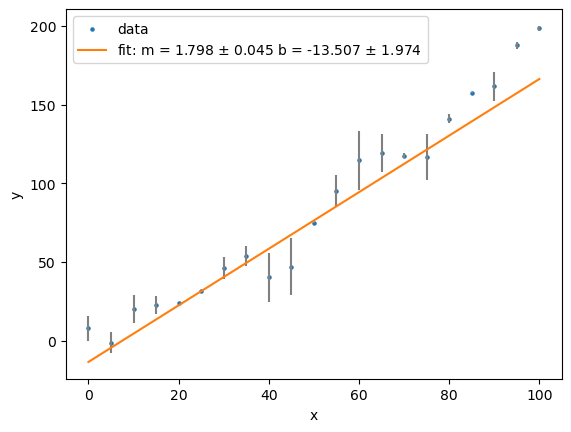

In [18]:
plt.scatter(x,y,s=5)
plt.errorbar(x,y, yerr = y_err, ecolor='grey', ls = 'none')
plt.plot(x,line(x,popt[0],popt[1]))
plt.xlabel("x")
plt.ylabel("y")
plt.legend(["data",str("fit: m = "+str(round(popt[0],3))+" $\pm$ "+str(round(perr[0],3))+" b = "+str(round(popt[1],3))+" $\pm$ "+str(round(perr[1],3)))])